# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
import warnings
warnings.filterwarnings(action='ignore')

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('data1.csv')
data.head()

,Date,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,avg_wait_time_7,boarding_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,23.657143,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,23.657143,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,23.657143,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,23.657143,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,23.657143,0.877647


In [28]:
data.tail()

,Date,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,avg_wait_time_7,boarding_rate
2916,2022-12-26,603,5555,4605,39.2,2163,7889,44.4,3.0,-7.3,...,86.0,51.0,10.25,Monday,12,Winter,2022,0.0,43.485714,0.828983
2917,2022-12-27,669,5635,4654,44.4,2198,8178,44.8,-0.3,-5.4,...,92.0,40.0,10.86,Tuesday,12,Winter,2022,0.0,42.771429,0.825909
2918,2022-12-28,607,5654,4648,44.8,2161,7882,52.5,1.7,-7.8,...,71.0,34.0,10.88,Wednesday,12,Winter,2022,0.0,43.514286,0.822073
2919,2022-12-29,581,5250,4247,52.5,2229,8433,38.3,2.1,-4.0,...,87.0,38.0,10.84,Thursday,12,Winter,2022,0.0,42.957143,0.808952
2920,2022-12-30,600,5293,4200,38.3,2183,8155,33.7,-4.4,-4.4,...,66.0,66.0,0.00,Friday,12,Winter,2022,0.0,41.042857,0.793501


In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2921 non-null   object 
 1   car_operation    2921 non-null   int64  
 2   booking_count    2921 non-null   int64  
 3   boarding_count   2921 non-null   int64  
 4   avg_wait_time    2921 non-null   float64
 5   avg_fare         2921 non-null   int64  
 6   avg_distance     2921 non-null   int64  
 7   target           2921 non-null   float64
 8   temp_max         2921 non-null   float64
 9   temp_min         2921 non-null   float64
 10  rain(mm)         2921 non-null   float64
 11  humidity_max(%)  2921 non-null   float64
 12  humidity_min(%)  2921 non-null   float64
 13  sunshine(MJ/m2)  2921 non-null   float64
 14  weekday          2921 non-null   object 
 15  month            2921 non-null   int64  
 16  season           2921 non-null   object 
 17  year          

In [30]:
# 1. 이동 거리 대비 대기 시간 비율
data['wait_distance_ratio'] = data['avg_wait_time'] / data['avg_distance']

# 2. 이동 거리와 대기 시간 간의 차이 변수
data['distance_wait_time_diff'] = data['avg_distance'] - data['avg_wait_time']

# 3. 요일별 평균 대기 시간
weekday_avg_wait_time = data.groupby('weekday')['avg_wait_time'].mean()
data['weekday_avg_wait_time'] = data['weekday'].map(weekday_avg_wait_time)

# 4. 월별 평균 대기 시간
month_avg_wait_time = data.groupby('month')['avg_wait_time'].mean()
data['month_avg_wait_time'] = data['month'].map(month_avg_wait_time)

# 5. 연도별 평균 대기 시간
year_avg_wait_time = data.groupby('year')['avg_wait_time'].mean()
data['year_avg_wait_time'] = data['year'].map(year_avg_wait_time)

# 6. 강수량과 온도차이, 습도 변화량

data['rain_temp_diff'] = data['rain(mm)'] - (data['temp_max'] - data['temp_min'])
data['humidity_diff'] = data['humidity_max(%)'] - data['humidity_min(%)']

# 7. 접수건수 대비 대기시간 비율, 탑승건수 대비 대기시간 비율
data['booking_wait_ratio'] = data['booking_count'] / data['avg_wait_time']
data['boarding_wait_ratio'] = data['boarding_count'] / data['avg_wait_time']

data.head()

,Date,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,...,boarding_rate,wait_distance_ratio,distance_wait_time_diff,weekday_avg_wait_time,month_avg_wait_time,year_avg_wait_time,rain_temp_diff,humidity_diff,booking_wait_ratio,boarding_wait_ratio
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,0.903226,0.002155,10740.8,41.043780,33.393952,34.059452,-6.9,35.0,44.094828,39.827586
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,0.898987,0.001997,8593.8,40.956459,33.393952,34.059452,-11.6,36.0,183.604651,165.058140
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,0.918689,0.002569,10171.8,43.503597,33.393952,34.059452,-8.0,31.0,62.900763,57.786260
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,0.927096,0.002236,10930.5,34.902878,33.393952,34.059452,-8.8,43.0,67.183673,62.285714
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,0.877647,0.003024,8636.8,39.243165,33.393952,34.059452,-8.1,69.0,162.213740,142.366412


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [16]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()

In [17]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


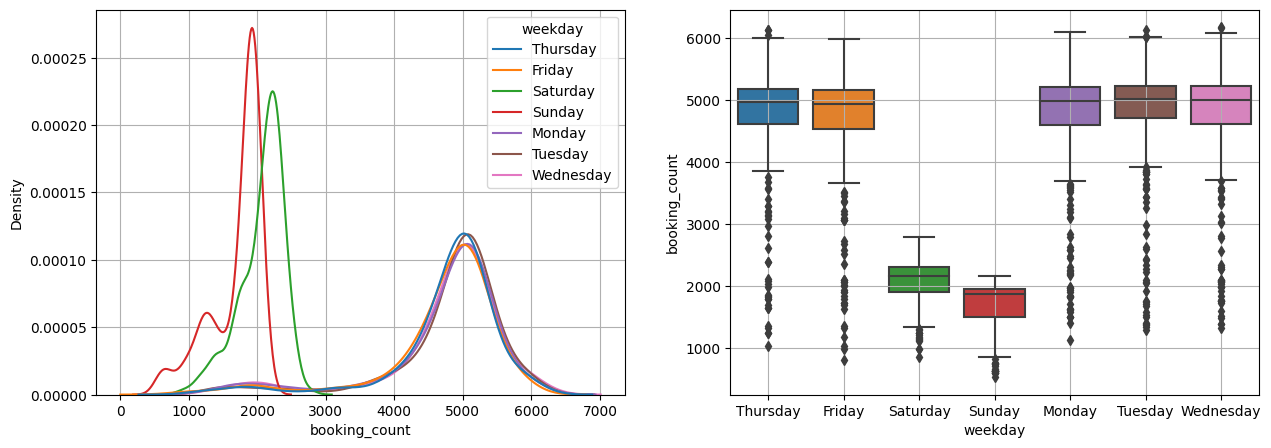

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


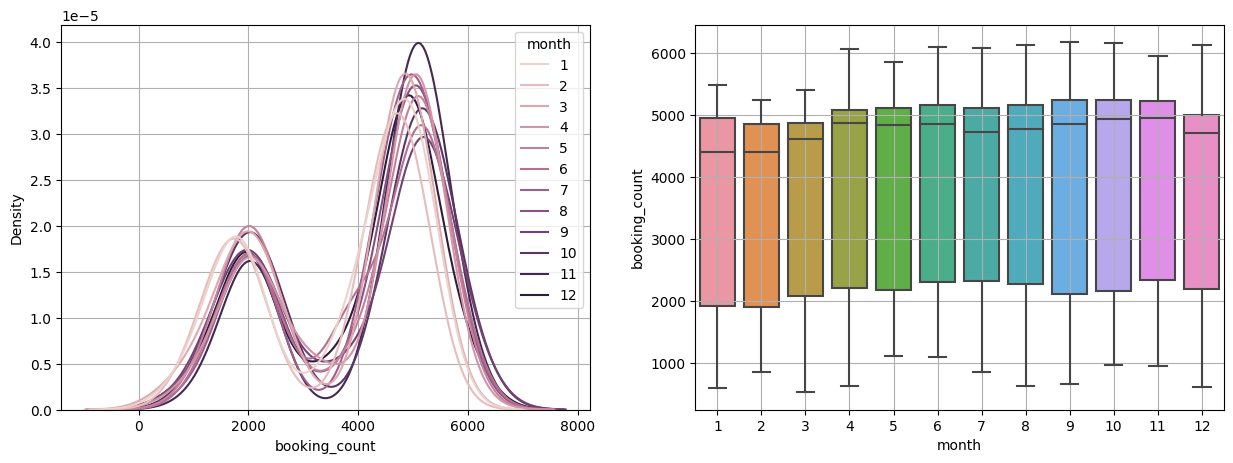

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
booking_count,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


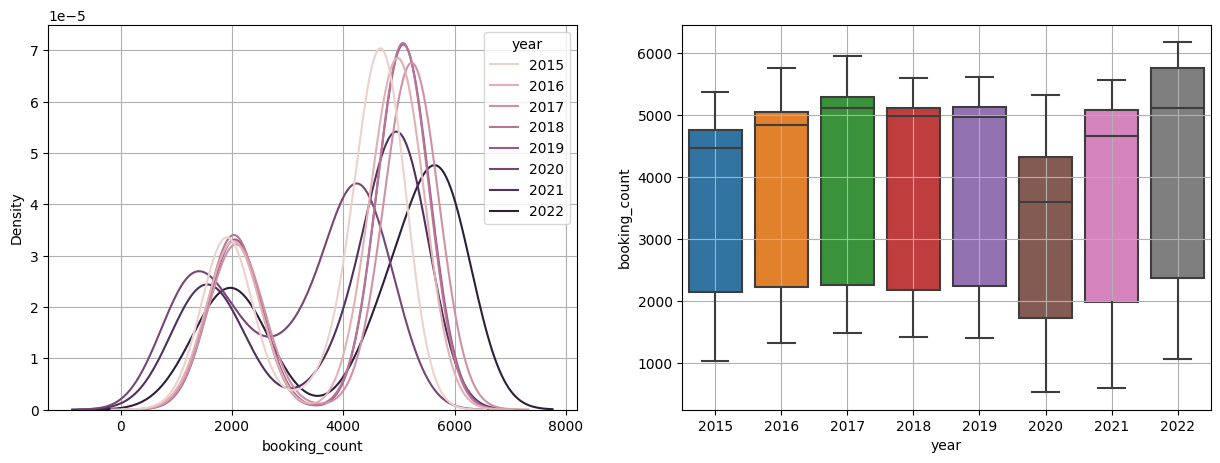

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'booking_count'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일의 접수건들이 주말보다 2.5배 정도 많음(2000, 5000)
- 월별 : 2000건과 5000건에 많이 분포, 5000건에 더 밀집되어 있다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


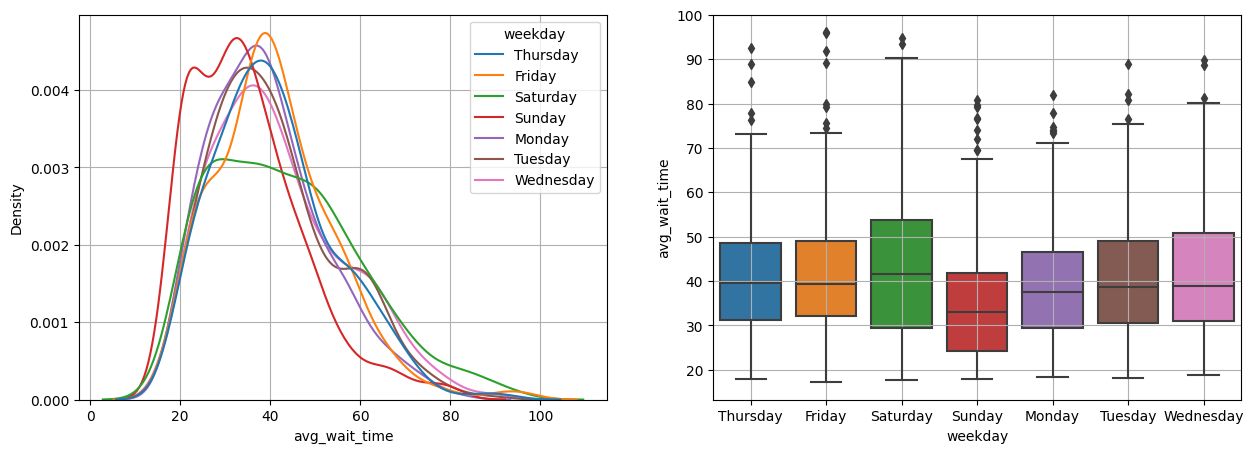

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


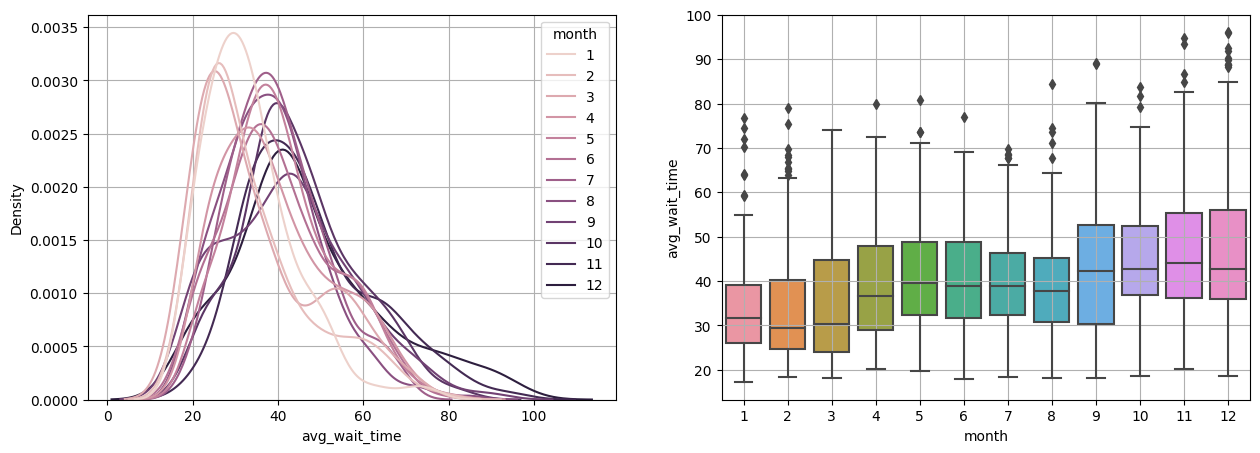

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_wait_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


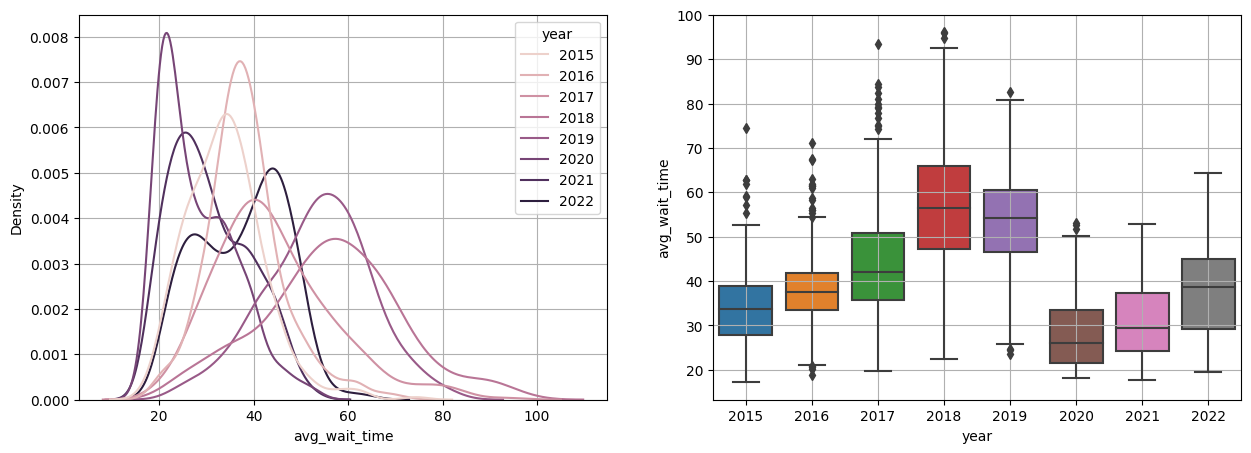

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_wait_time'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 토요일의 대기 시간이 많은 편이고, 일요일은 조금 적다
- 월별 : 겨울 여름 가을 순으로 증가
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


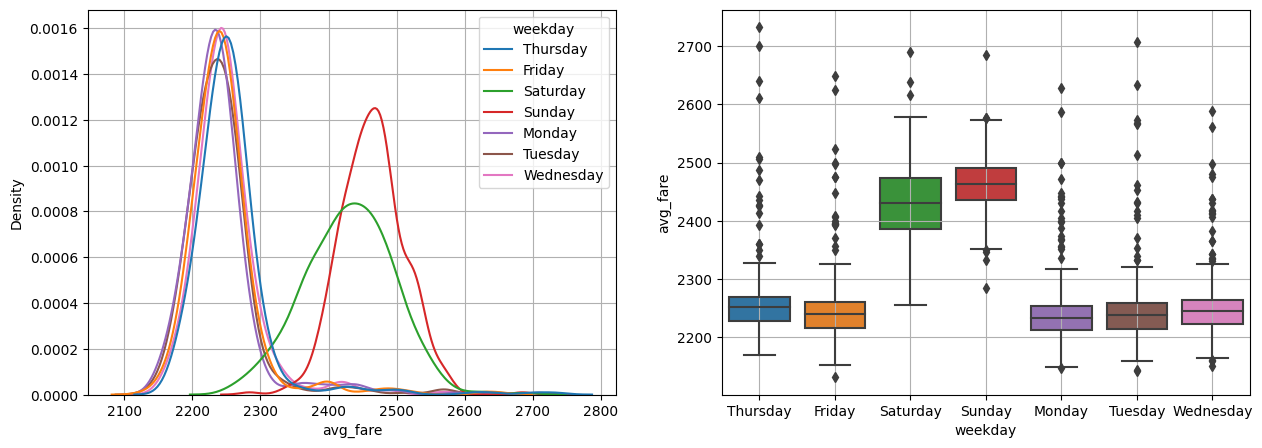

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


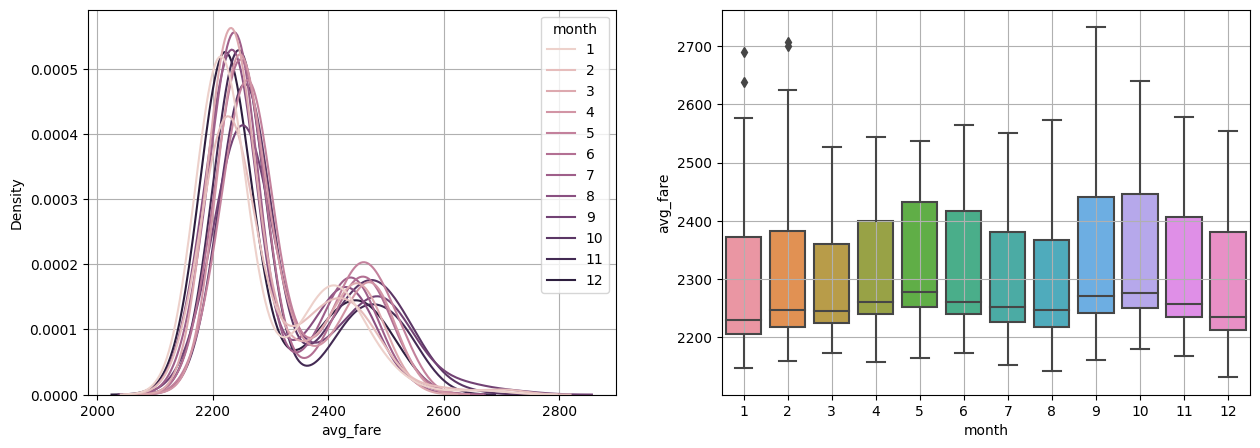

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


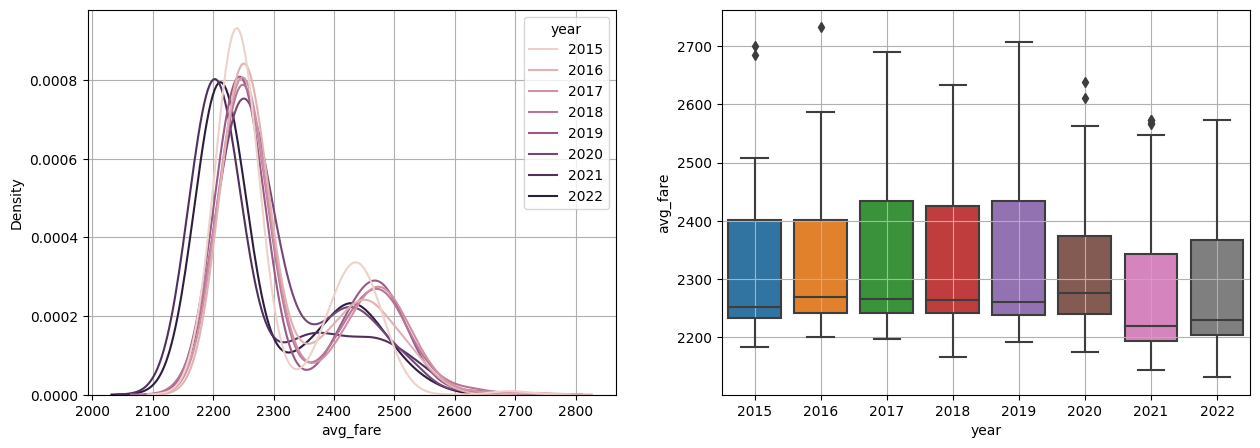

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_fare'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일보다 주말에 운임료를 많이 내는 편이다
- 월별 : 4 ~ 6월, 9~10월에 운임료를 많이 낸다
- 연도별 : 연도가 지남에 따라 증가하다가 2020년 급격히 감소, 그 이후 다시 증가 (아마 코로나)

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


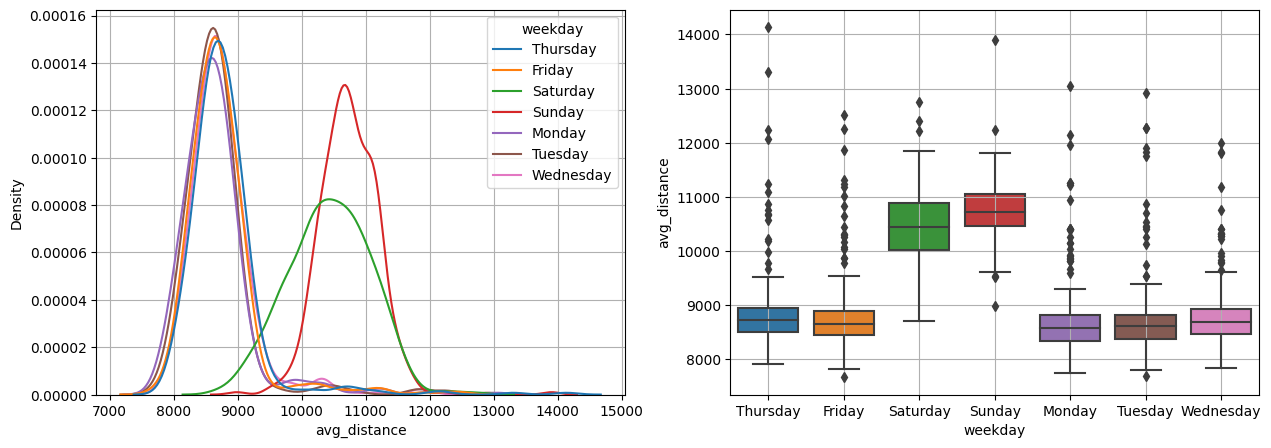

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


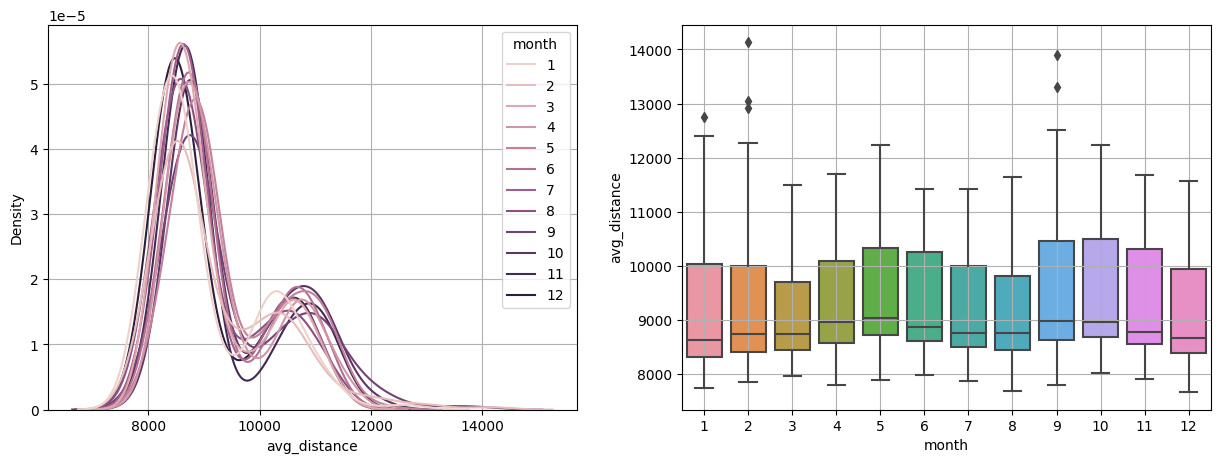

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
avg_distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


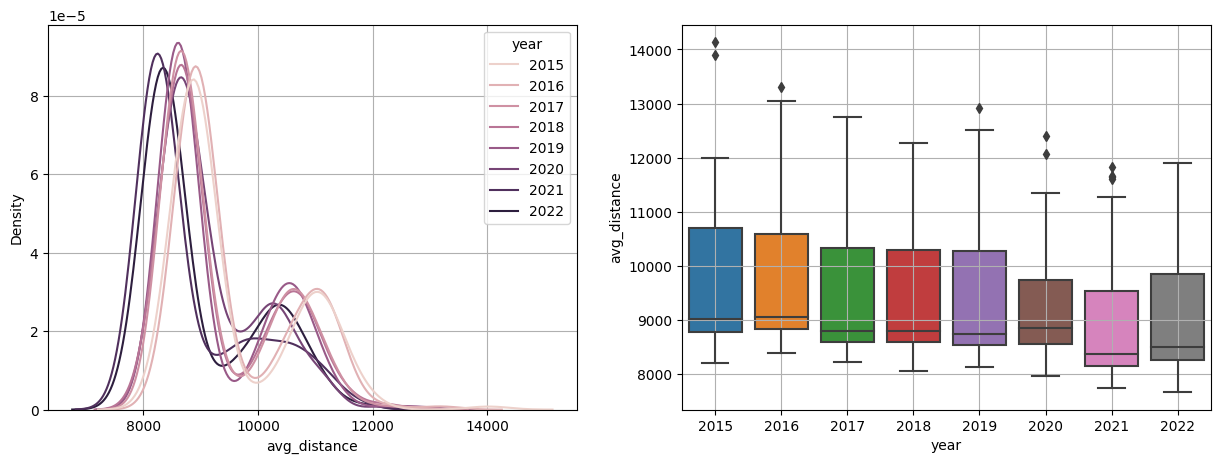

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'avg_distance'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일보다 주말에 이동을 멀리 한다
- 월별 : 4 ~ 6월, 9~10월에 이동을 많이 한다
- 연도별 : 연도가 지남에 따라 감소하는 추세이다

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


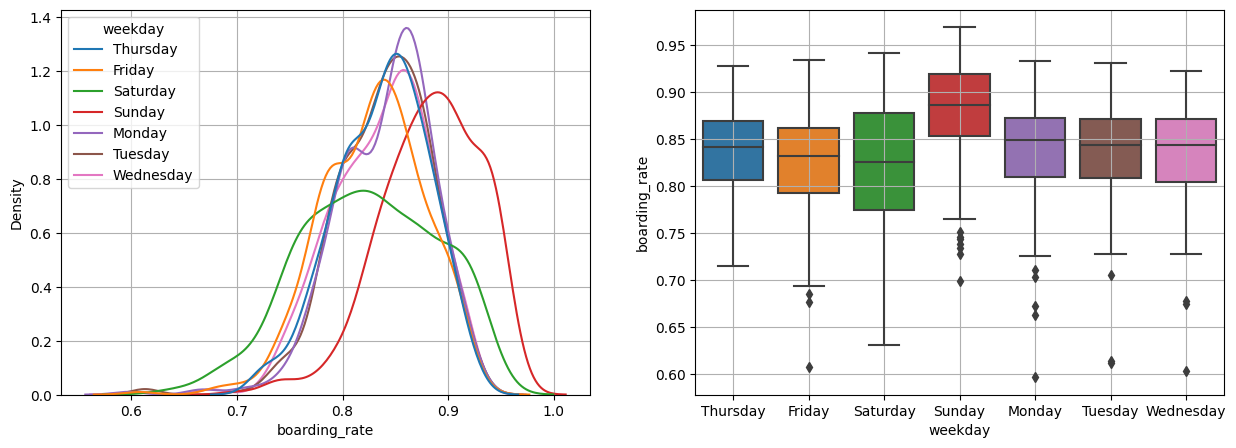

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


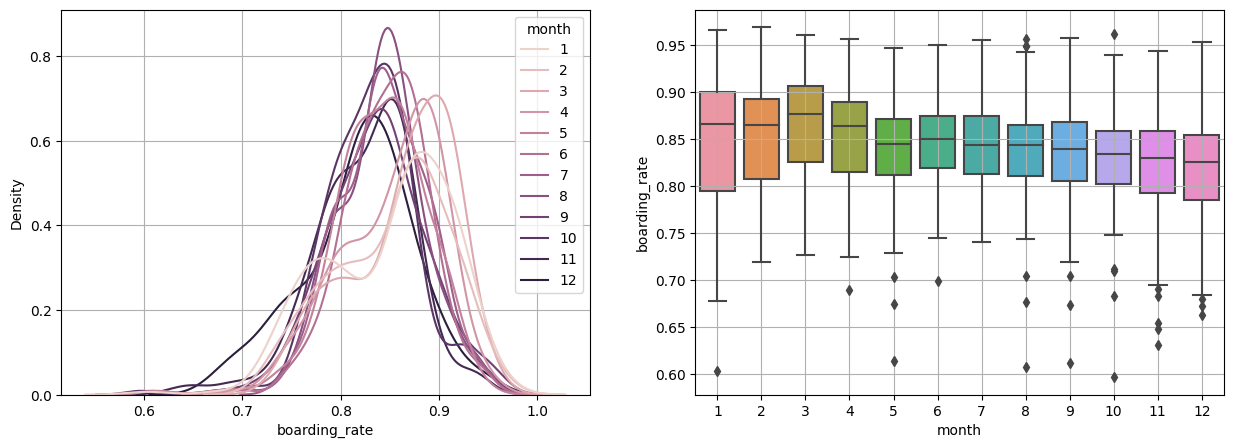

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
boarding_rate,2921.0,0.84158,0.052181,0.596996,0.805956,0.84566,0.877722,0.968844


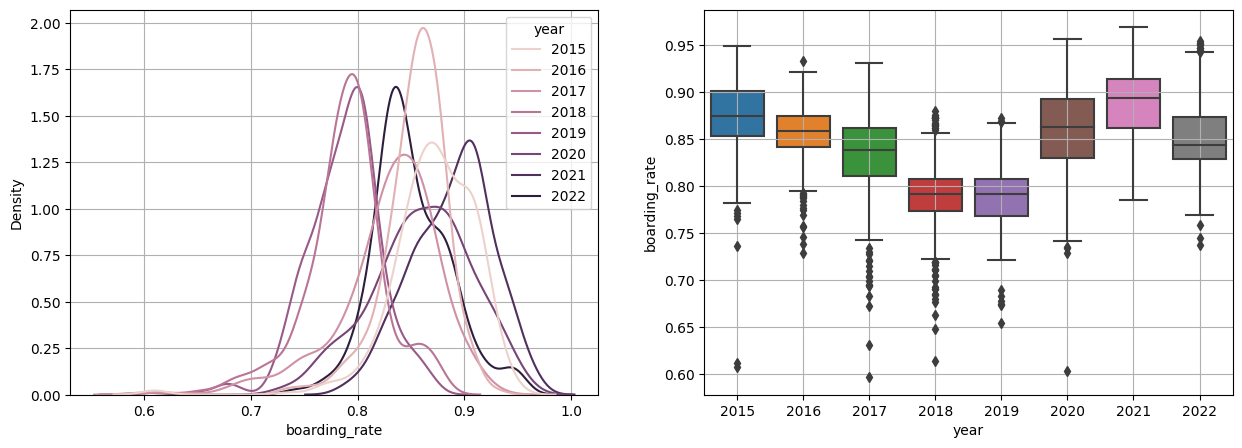

In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'boarding_rate'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 평일의 탑승률이 주말보다 높음
- 월별 : 겨울에 탑승률이 높을 때가 많다
- 연도별 : 연도가 지남에 따라 감소하는 추세이다

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


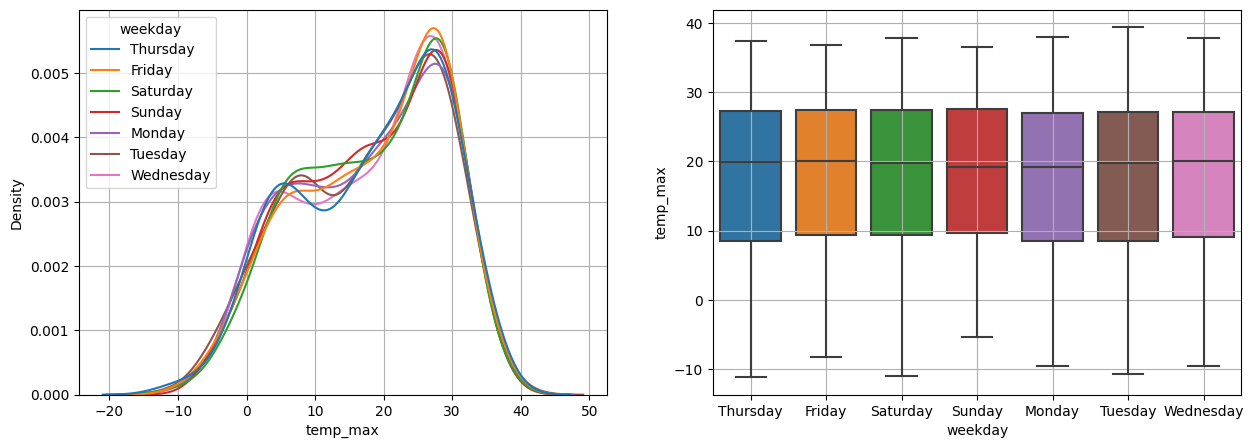

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


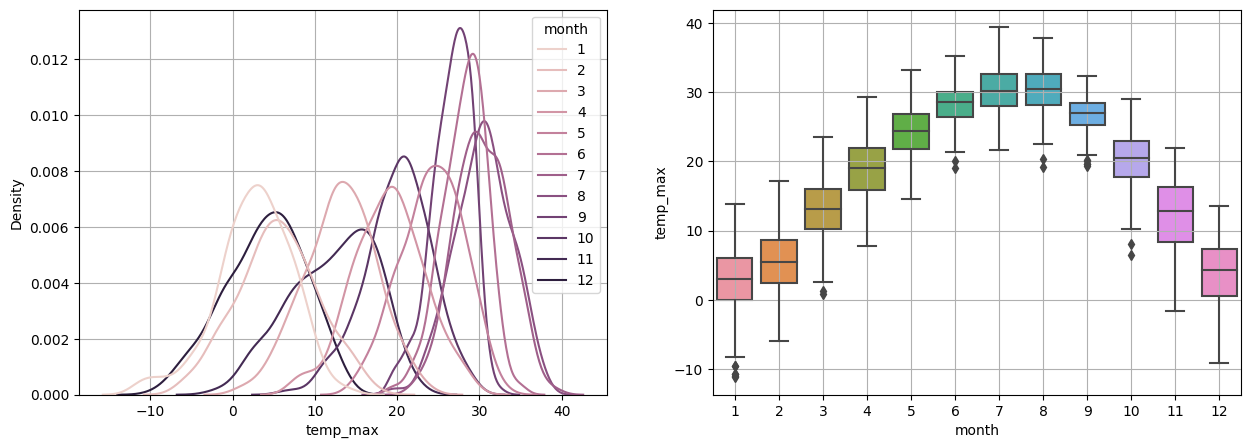

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.077405,10.706655,-11.2,9.0,19.7,27.4,39.4


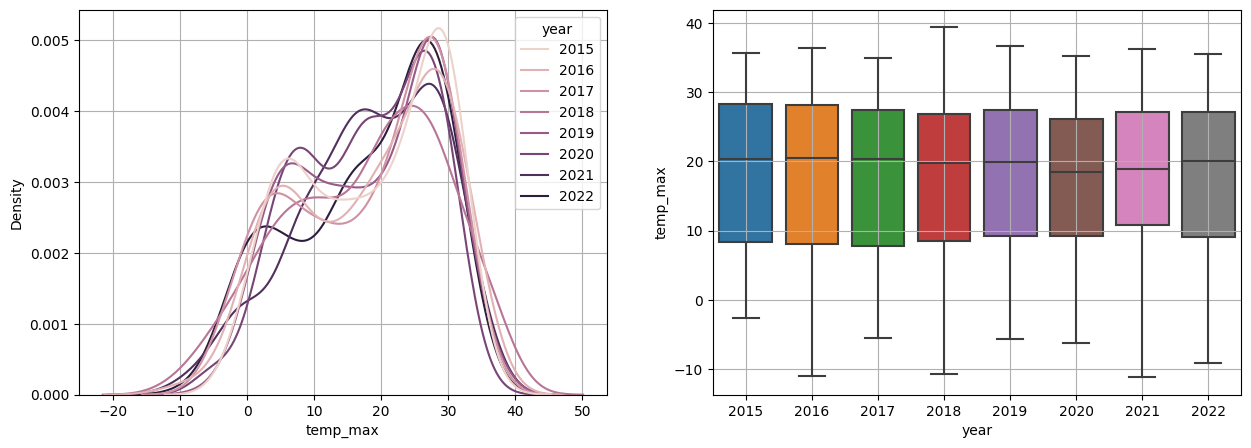

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'temp_max'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 거의 모든 요일 분포 비슷
- 월별 : 여름이 높고 겨울이 낮다
- 연도별 : 거의 모든 연도 비슷

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


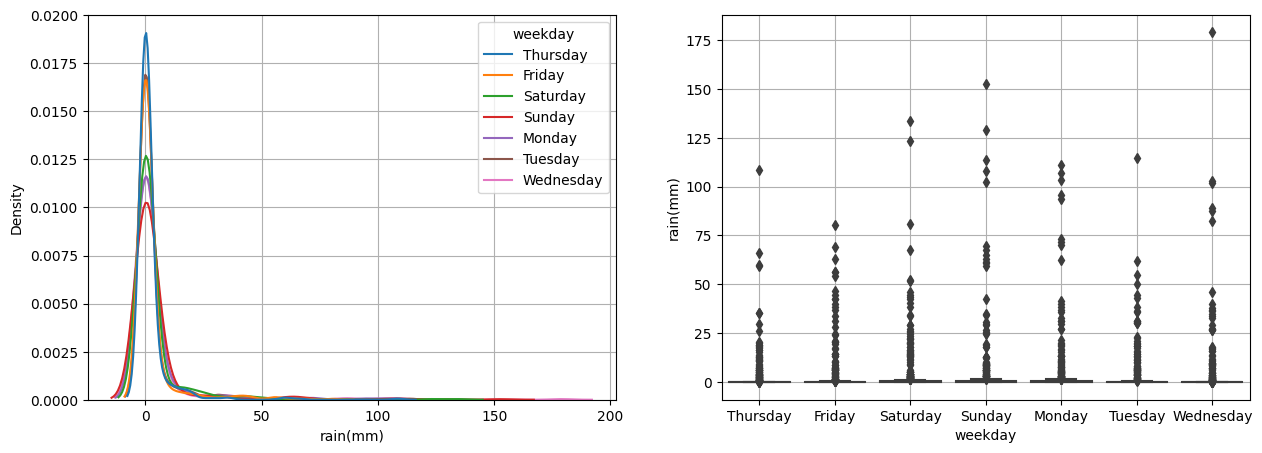

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'weekday'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


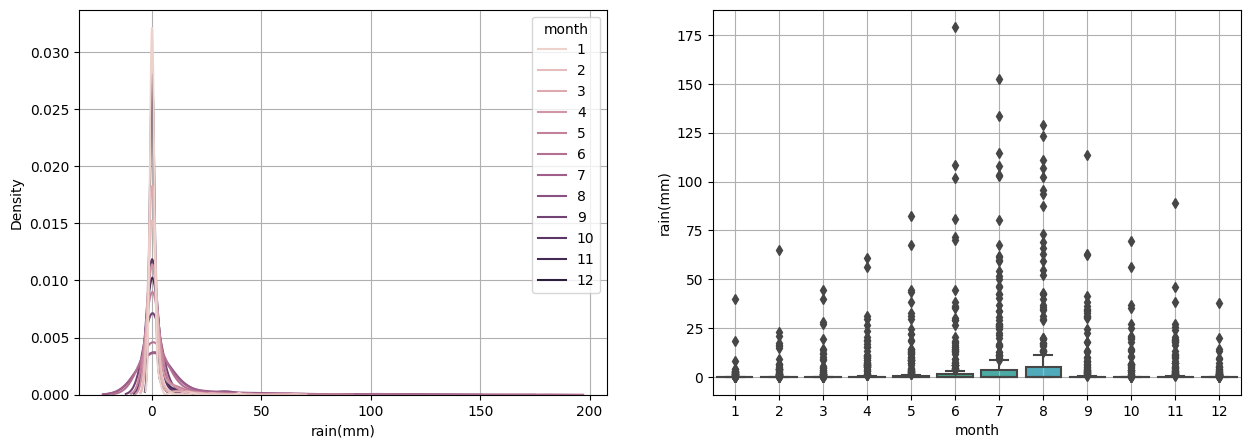

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'month'
eda_1_n(data, var, hue_var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


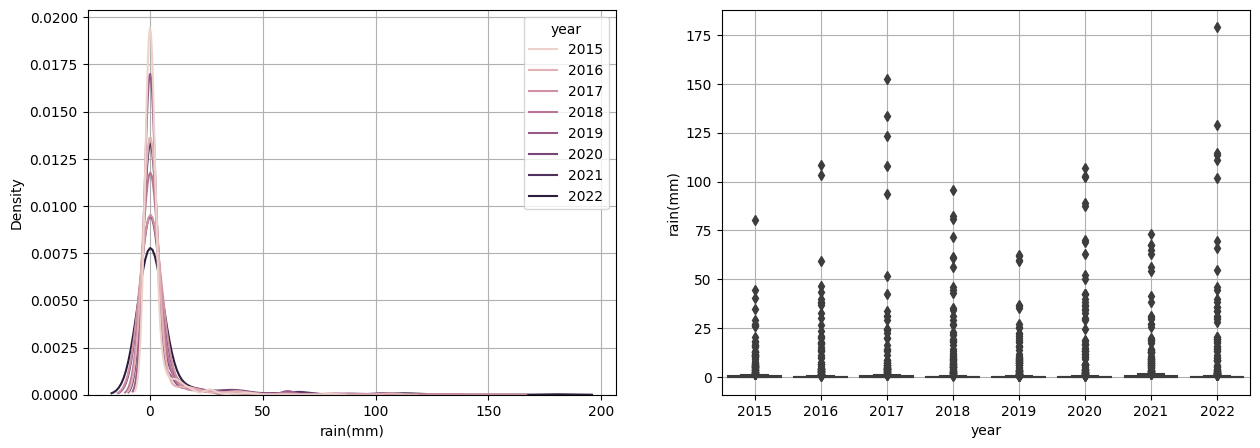

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'rain(mm)'
hue_var = 'year'
eda_1_n(data, var, hue_var)

- 요일별 : 주말과 수요일에 강수량이 조금 많다
- 월별 : 여름에 많이 온다 (장마철 포함)
- 연도별 : 2017, 2022년에 강수량이 높다

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
0.0,2802,0.959261
1.0,119,0.040739


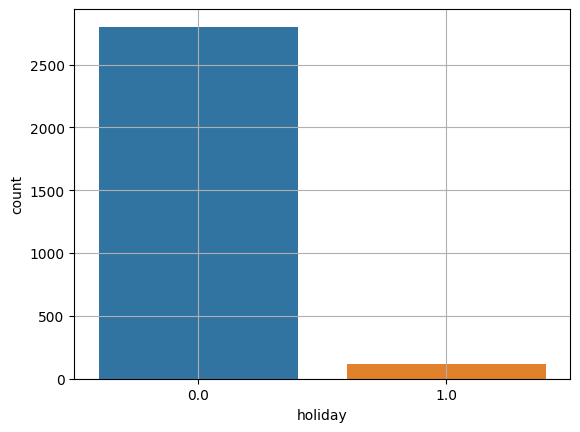

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
var = 'holiday'
eda_1_c(data, var)

- 휴일이 아닌 비율이 훨씬 많다

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

In [32]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(15, 15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True, annot_kws = {'size' : 9}, fmt = '.2f')
    plt.show()

In [33]:
data.columns

Index(['Date', 'car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'weekday', 'month', 'season', 'year', 'holiday',
       'avg_wait_time_7', 'boarding_rate', 'wait_distance_ratio',
       'distance_wait_time_diff', 'weekday_avg_wait_time',
       'month_avg_wait_time', 'year_avg_wait_time', 'rain_temp_diff',
       'humidity_diff', 'booking_wait_ratio', 'boarding_wait_ratio'],
      dtype='object')

,car_operation,booking_count,boarding_count,avg_wait_time,avg_fare,avg_distance,target,temp_max,temp_min,rain(mm),...,boarding_rate,wait_distance_ratio,distance_wait_time_diff,weekday_avg_wait_time,month_avg_wait_time,year_avg_wait_time,rain_temp_diff,humidity_diff,booking_wait_ratio,boarding_wait_ratio
car_operation,1.0,0.885836,0.904627,0.035641,-0.844823,-0.857811,0.087627,0.108709,0.109642,0.002522,...,-0.028670,0.273009,-0.858066,0.301918,0.125344,-0.098091,0.003641,-0.057924,0.782582,0.745142
booking_count,0.0,1.000000,0.988746,0.291783,-0.850456,-0.847874,0.316181,0.058275,0.054250,-0.012944,...,-0.251648,0.517888,-0.851674,0.300083,0.092673,0.141539,-0.014615,-0.014269,0.682244,0.621764
boarding_count,0.0,0.000000,1.000000,0.184201,-0.868074,-0.858747,0.229127,0.064615,0.058540,-0.015894,...,-0.117905,0.415221,-0.861056,0.278250,0.065211,0.048631,-0.018870,-0.016663,0.754207,0.707808
avg_wait_time,0.0,0.000000,0.000000,1.000000,0.020279,-0.013169,0.732299,0.040863,0.034330,-0.005741,...,-0.770449,0.955637,-0.026994,0.177099,0.304594,0.681127,-0.010104,0.065356,-0.418257,-0.476376
avg_fare,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977569,-0.048772,0.083566,0.070480,0.011502,...,0.008039,-0.252046,0.977017,-0.306598,0.077964,0.098262,0.000744,0.066011,-0.791533,-0.753867
avg_distance,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.083855,0.087728,0.073549,0.004975,...,0.048136,-0.289359,0.999904,-0.297531,0.056065,0.048691,-0.006036,0.072562,-0.767055,-0.726183
target,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.044556,0.033645,0.028373,...,-0.588797,0.739496,-0.093958,-0.031456,0.298471,0.681523,0.017606,0.076586,-0.269802,-0.325952
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961606,0.116899,...,0.023890,0.017520,0.087138,0.004141,0.141748,-0.002710,0.082266,-0.028126,-0.021736,-0.022614
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201830,...,0.013375,0.015715,0.073053,0.002334,0.144287,-0.015345,0.219431,-0.148940,-0.020959,-0.023806
rain(mm),0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.004568,-0.002157,0.005053,-0.026058,0.006567,-0.018688,0.978775,-0.199867,-0.025227,-0.027746


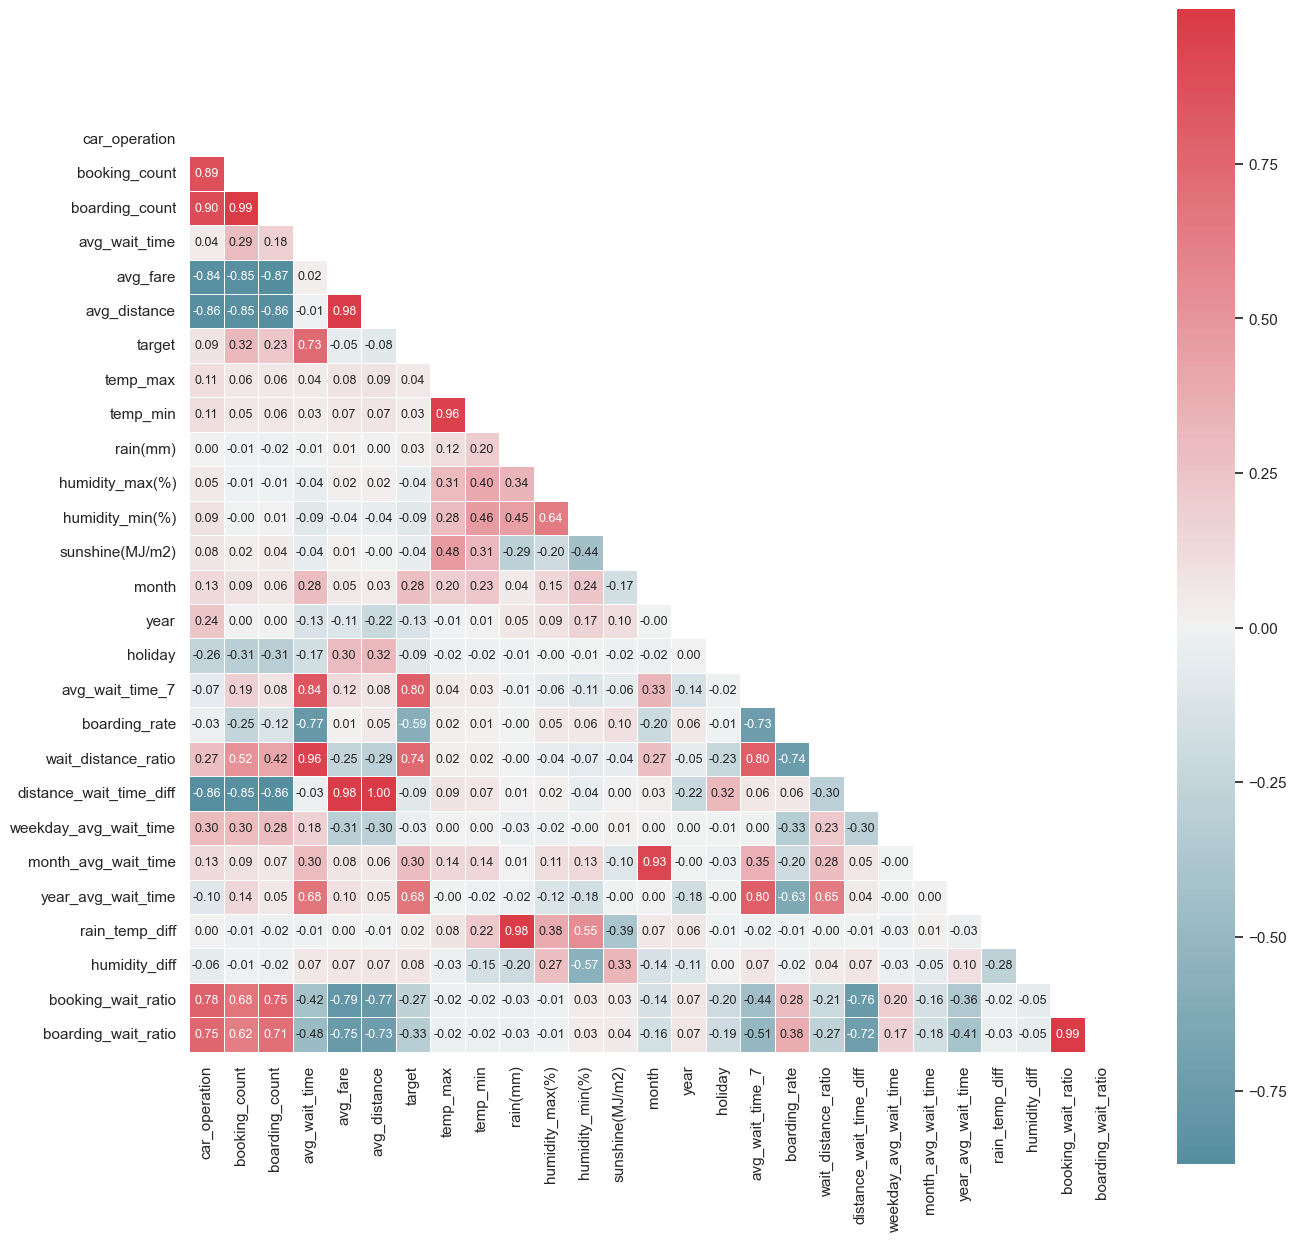

In [35]:
num_vars = ['car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'month', 'year', 'holiday', 'avg_wait_time_7', 
            'boarding_rate', 'wait_distance_ratio', 'distance_wait_time_diff', 'weekday_avg_wait_time',
       'month_avg_wait_time', 'year_avg_wait_time', 'rain_temp_diff',
       'humidity_diff', 'booking_wait_ratio', 'boarding_wait_ratio']

eda_2_corr(data, num_vars)

- 상관계수 높은 변수 : 평균 대기 시간, 이동시간 7일 평균, 탑승률, 이동거리 대비 대기시간, 연도별 평균 대기시간

- 약간 높음 : 접수건수, 탐승건수, 월, 월별 평균 대기시간, 접수건수 대비 대기시간, 탑승건수 대비 대기시간

- 낮음 : 나머지

#### 2) 산점도

In [37]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* 평균 대기 시간

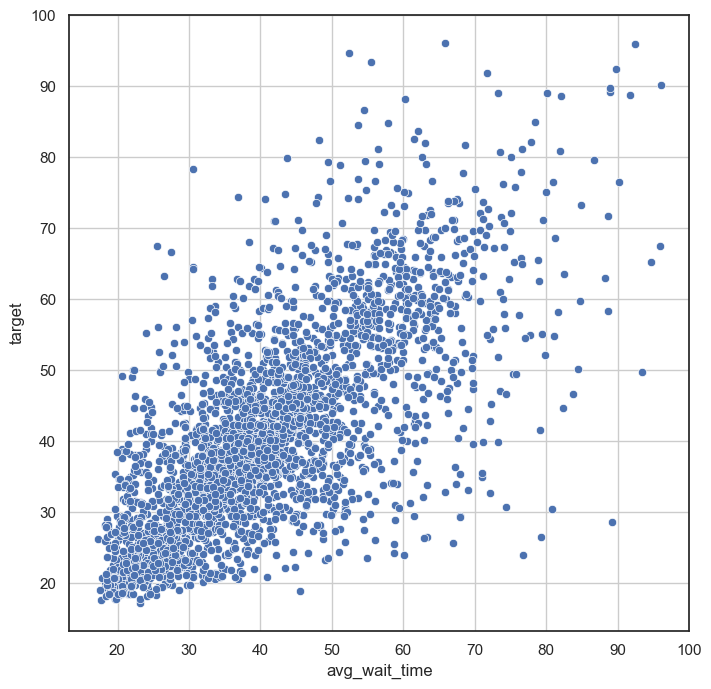

In [38]:
eda_2_nn(data, 'target', 'avg_wait_time')

* 7일 평균

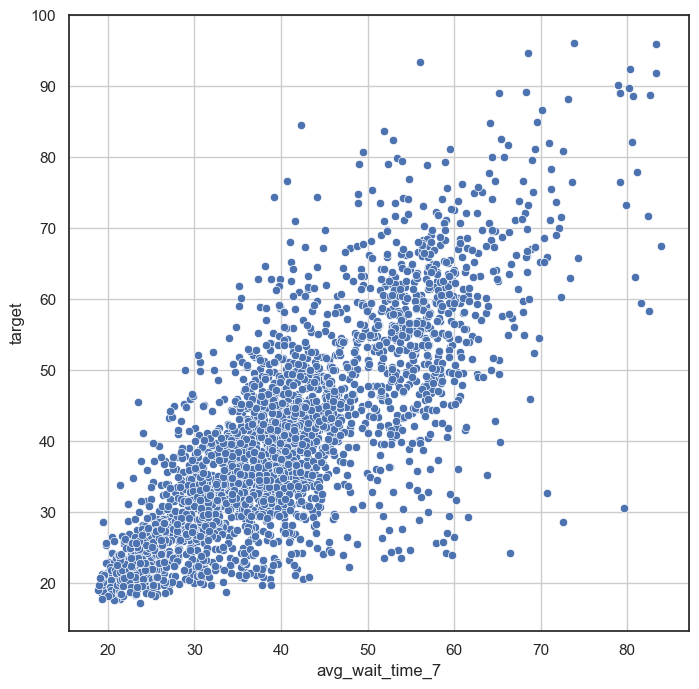

In [39]:
eda_2_nn(data, 'target', 'avg_wait_time_7')

- 탑승률

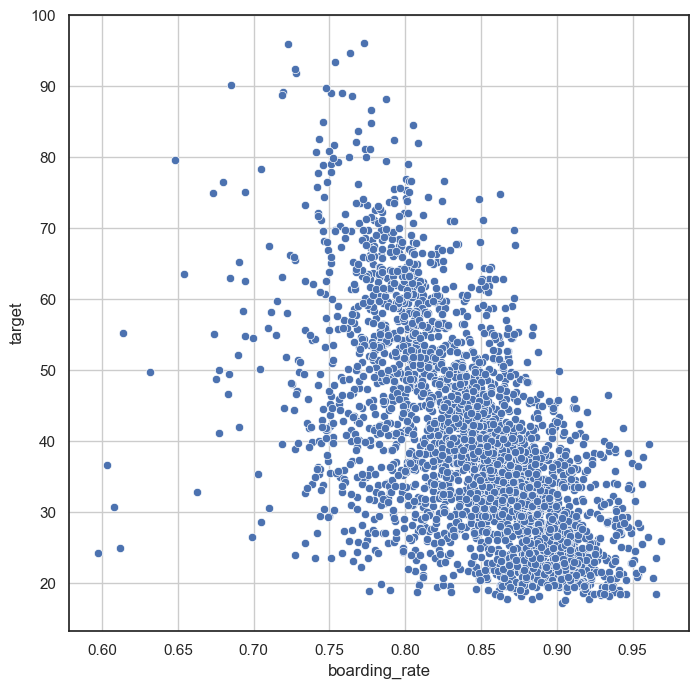

In [40]:
eda_2_nn(data, 'target', 'boarding_rate')

- 이동거리 대비 대기시간

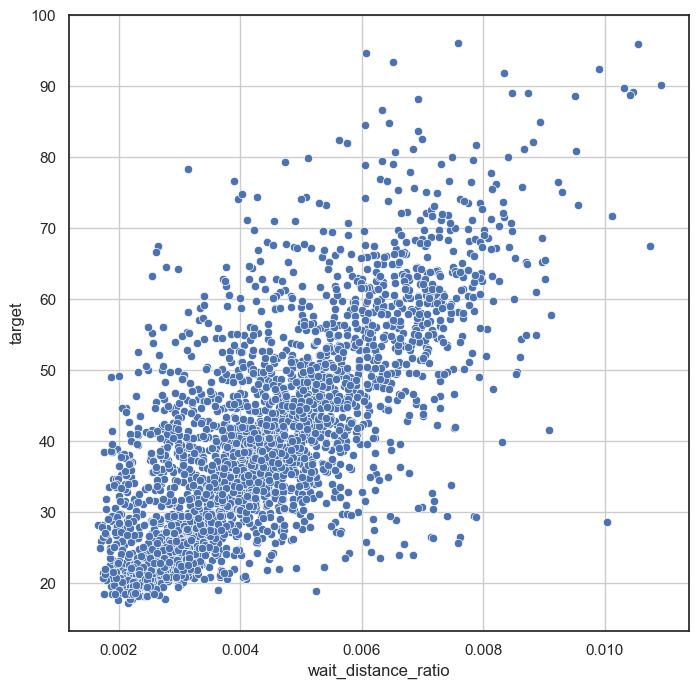

In [41]:
eda_2_nn(data, 'target', 'wait_distance_ratio')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

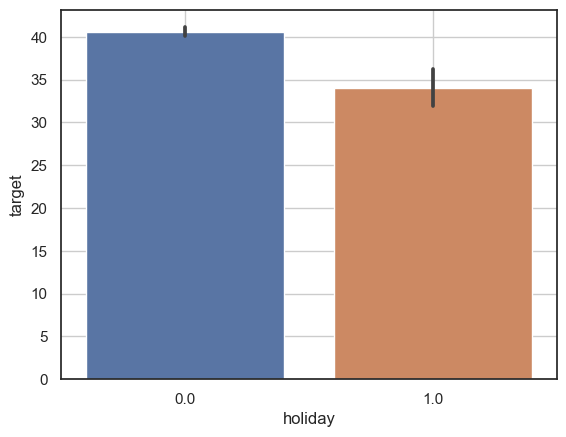

In [114]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x = 'holiday', y = 'target', data = data)
plt.grid()
plt.show()

In [115]:
# t-test
h0 = data.loc[data['holiday']==0, 'target']
h1 = data.loc[data['holiday']==1, 'target']
spst.ttest_ind(h0, h1)

Ttest_indResult(statistic=4.99765770730323, pvalue=6.145444639480913e-07)

휴일과 평균 대기시간은 관련이 있다

* 요일

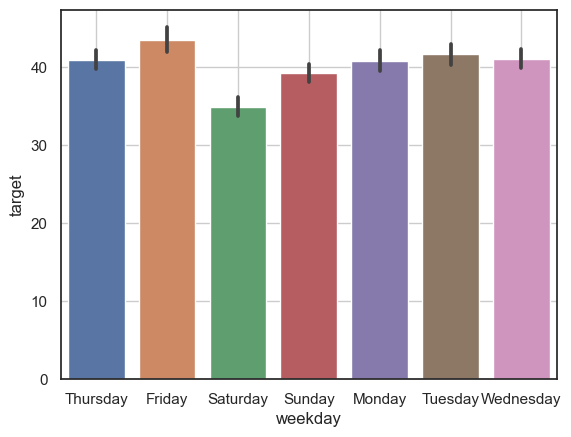

In [116]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.barplot(x = 'weekday', y = 'target', data = data)
plt.grid()
plt.show()

In [117]:
# anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', 'target']
w1 = temp.loc[temp['weekday']=='Tuesday', 'target']
w2 = temp.loc[temp['weekday']=='Wednesday', 'target']
w3 = temp.loc[temp['weekday']=='Thursday', 'target']
w4 = temp.loc[temp['weekday']=='Friday', 'target']
w5 = temp.loc[temp['weekday']=='Saturday', 'target']
w6 = temp.loc[temp['weekday']=='Sunday', 'target']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.709598754374598, pvalue=7.824951103498204e-18)

요일에 따라서 대기시간의 차이가 크다

* 계절

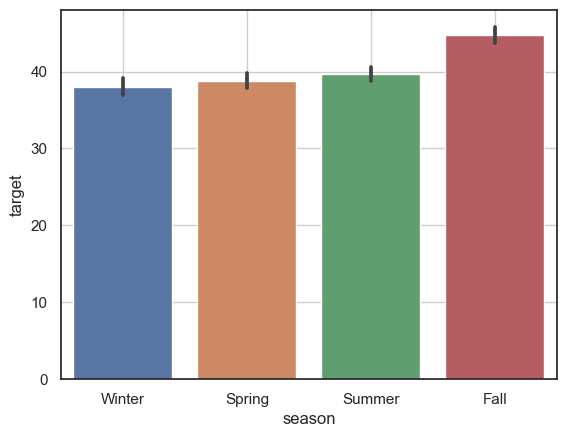

In [118]:
sns.barplot(x = 'season', y = 'target', data = data)
plt.grid()
plt.show()

In [119]:
# anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'target']
s1 = temp.loc[temp['season']=='Summer', 'target']
s2 = temp.loc[temp['season']=='Fall', 'target']
s3 = temp.loc[temp['season']=='Winter', 'target']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=35.02524244911058, pvalue=3.116240365654587e-22)

계절에 따라 대기시간에 큰 차이가 있다

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

- 상관계수 높은 변수 : 평균 대기 시간, 이동시간 7일 평균, 탑승률, 이동거리 대비 대기시간, 연도별 평균 대기시간

- 약간 높음 : 접수건수, 탐승건수, 월, 월별 평균 대기시간, 접수건수 대비 대기시간, 탑승건수 대비 대기시간

- 낮음 : 나머지

In [44]:
data.columns

Index(['Date', 'car_operation', 'booking_count', 'boarding_count',
       'avg_wait_time', 'avg_fare', 'avg_distance', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'weekday', 'month', 'season', 'year', 'holiday',
       'avg_wait_time_7', 'boarding_rate', 'wait_distance_ratio',
       'distance_wait_time_diff', 'weekday_avg_wait_time',
       'month_avg_wait_time', 'year_avg_wait_time', 'rain_temp_diff',
       'humidity_diff', 'booking_wait_ratio', 'boarding_wait_ratio'],
      dtype='object')

* 강한 관계의 변수

In [45]:
strong_feature = ['avg_wait_time', 'avg_wait_time_7', 'boarding_rate', 'wait_distance_ratio', 'year_avg_wait_time'] # 평균 대기시간, 대기시간 7일 평균, 탑승률, 이동거리 대비 대기시간, 연도별 평균 대기시간

* 중간(약한) 관계의 변수

In [46]:
middle_feature = ['booking_count', 'boarding_count', 'holiday', 'month',  'weekday', 'season', 'month_avg_wait_time', 'booking_wait_ratio', 'boarding_wait_ratio'] # 접수건수, 탐승건수, 휴일, 월, 요일, 계절, 월별 평균 대기시간, 접수건수 대비 대기시간, 탑승건수 대비 대기시간

* (거의) 관계가 없는 변수

나머지 변수들 (날씨 정보, 이동거리 등)

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

강한 + 중간 관계 변수만 추출

In [48]:
data = data[['Date'] + strong_feature + middle_feature + ['target']]
data.head()

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,weekday,season,month_avg_wait_time,booking_wait_ratio,boarding_wait_ratio,target
0,2015-01-01,23.2,23.657143,0.903226,0.002155,34.059452,1023,924,1.0,1,Thursday,Winter,33.393952,44.094828,39.827586,17.2
1,2015-01-02,17.2,23.657143,0.898987,0.001997,34.059452,3158,2839,0.0,1,Friday,Winter,33.393952,183.604651,165.058140,26.2
2,2015-01-03,26.2,23.657143,0.918689,0.002569,34.059452,1648,1514,0.0,1,Saturday,Winter,33.393952,62.900763,57.786260,24.5
3,2015-01-04,24.5,23.657143,0.927096,0.002236,34.059452,1646,1526,0.0,1,Sunday,Winter,33.393952,67.183673,62.285714,26.2
4,2015-01-05,26.2,23.657143,0.877647,0.003024,34.059452,4250,3730,0.0,1,Monday,Winter,33.393952,162.213740,142.366412,23.6


In [49]:
data.corr()

,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,month_avg_wait_time,booking_wait_ratio,boarding_wait_ratio,target
avg_wait_time,1.000000,0.842909,-0.770449,0.955637,0.681127,0.291783,0.184201,-0.169203,0.283033,0.304594,-0.418257,-0.476376,0.732299
avg_wait_time_7,0.842909,1.000000,-0.731572,0.795830,0.798768,0.188841,0.081982,-0.021008,0.329396,0.354565,-0.444433,-0.505137,0.800499
boarding_rate,-0.770449,-0.731572,1.000000,-0.740284,-0.625855,-0.251648,-0.117905,-0.012719,-0.204364,-0.201563,0.279216,0.377026,-0.588797
wait_distance_ratio,0.955637,0.795830,-0.740284,1.000000,0.646784,0.517888,0.415221,-0.227671,0.265160,0.278390,-0.205559,-0.273884,0.739496
year_avg_wait_time,0.681127,0.798768,-0.625855,0.646784,1.000000,0.141539,0.048631,-0.000607,0.000829,0.000851,-0.358537,-0.411256,0.681523
booking_count,0.291783,0.188841,-0.251648,0.517888,0.141539,1.000000,0.988746,-0.308071,0.090009,0.092673,0.682244,0.621764,0.316181
boarding_count,0.184201,0.081982,-0.117905,0.415221,0.048631,0.988746,1.000000,-0.312452,0.060991,0.065211,0.754207,0.707808,0.229127
holiday,-0.169203,-0.021008,-0.012719,-0.227671,-0.000607,-0.308071,-0.312452,1.000000,-0.022606,-0.028851,-0.197705,-0.190330,-0.092108
month,0.283033,0.329396,-0.204364,0.265160,0.000829,0.090009,0.060991,-0.022606,1.000000,0.929215,-0.144929,-0.163573,0.276215
month_avg_wait_time,0.304594,0.354565,-0.201563,0.278390,0.000851,0.092673,0.065211,-0.028851,0.929215,1.000000,-0.159557,-0.176417,0.298471


In [50]:
data.tail(91)

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,weekday,season,month_avg_wait_time,booking_wait_ratio,boarding_wait_ratio,target
2830,2022-10-01,50.6,44.057143,0.805775,0.004666,37.476374,2528,2037,0.0,10,Saturday,Fall,44.480242,49.960474,40.256917,36.4
2831,2022-10-02,36.4,44.200000,0.842894,0.003369,37.476374,1935,1631,0.0,10,Sunday,Fall,44.480242,53.159341,44.807692,24.9
2832,2022-10-03,24.9,41.257143,0.804921,0.002523,37.476374,1707,1374,1.0,10,Monday,Fall,44.480242,68.554217,55.180723,41.0
2833,2022-10-04,41.0,40.885714,0.838764,0.004913,37.476374,5923,4968,0.0,10,Tuesday,Fall,44.480242,144.463415,121.170732,48.4
2834,2022-10-05,48.4,41.414286,0.834178,0.005793,37.476374,5916,4935,0.0,10,Wednesday,Fall,44.480242,122.231405,101.962810,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2022-12-26,39.2,43.485714,0.828983,0.004969,37.476374,5555,4605,0.0,12,Monday,Winter,46.765992,141.709184,117.474490,44.4
2917,2022-12-27,44.4,42.771429,0.825909,0.005429,37.476374,5635,4654,0.0,12,Tuesday,Winter,46.765992,126.914414,104.819820,44.8
2918,2022-12-28,44.8,43.514286,0.822073,0.005684,37.476374,5654,4648,0.0,12,Wednesday,Winter,46.765992,126.205357,103.750000,52.5
2919,2022-12-29,52.5,42.957143,0.808952,0.006226,37.476374,5250,4247,0.0,12,Thursday,Winter,46.765992,100.000000,80.895238,38.3


In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.to_csv('data2.csv', index=False)